In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


#import boto3
#import sagemaker

In [ ]:
# session and role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role

# create an S3 bucket
bucket = sagemaker_session.default_bucket()# session and role

In [ ]:
# Get the data


#!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz
#!gunzip kddcup.data.gz

In [ ]:
! pip install wget

In [ ]:
# Get the data 

import wget

print('Beginning file download with wget module')

url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz'
wget.download(url)


In [ ]:
import gzip
import shutil
with gzip.open('kddcup.data.gz', 'rb') as f_in:
    with open('kddcup.data', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [2]:
kdd = pd.read_csv("kddcup.data")

In [ ]:
kdd.head()

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
             "urgent","hot","num_failed_logins","logged_in","num_compromised",
             "root_shell","su_attempted","num_root","num_file_creations",
             "num_shells","num_access_files","num_outbound_cmds",
             "is_hot_login","is_guest_login","count","srv_count","serror_rate",
             "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
             "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

kdd.columns = col_names

## Exploratory Data Analysis (EDA)

In [ ]:
kdd.head()

In [ ]:
kdd.describe()

In [ ]:
kdd.info()

In [ ]:
# check if there are NaN
kdd.isnull().sum().sum()

In [ ]:
# getting information about labels
labels = set(kdd["target"].values)
print("Different target labels are: " + str(labels))

In [ ]:
class_distribution = kdd["target"].value_counts()
class_distribution.plot(kind='bar')

## Pairs Plot

In [4]:
#kdd.to_pickle('kdd.pkl')
#kdd = pd.read_pickle('kdd.pkl')

kdd_frac=kdd.sample(frac=0.005)
kdd = None

In [7]:
def pairplot(data, label, features=[]):
    '''
    This function creates pairplot taking 4 features from our dataset as default parameters along with the output variable
    '''
    sns.pairplot(data, hue=label, height=4, diag_kind='hist', vars=features,
            plot_kws={'alpha':1, 's':80, 'edgecolor':'k'})

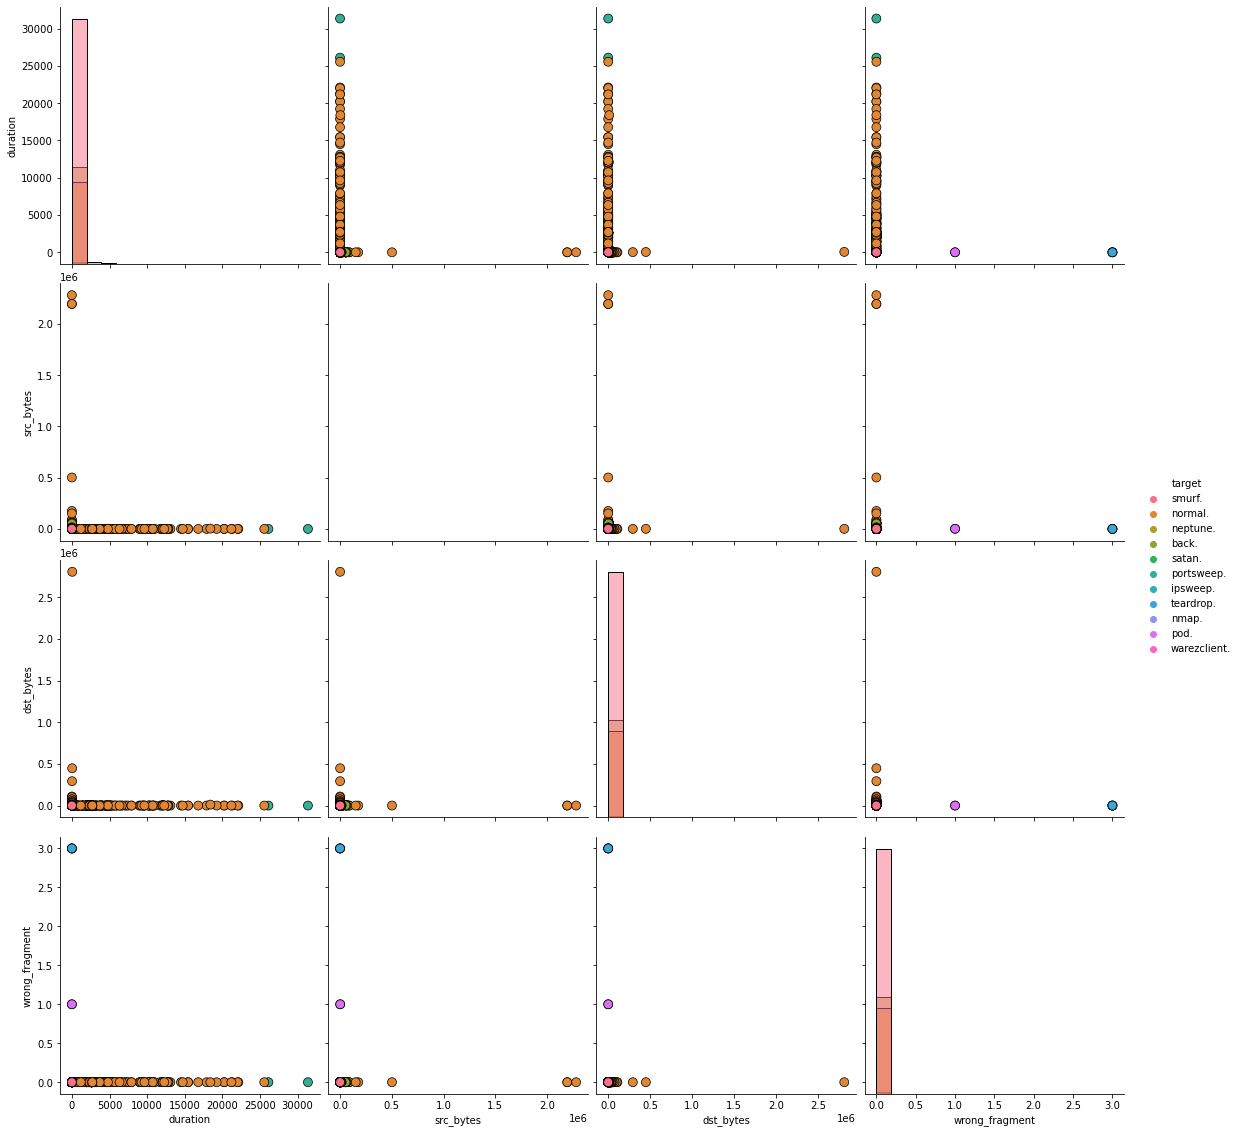

In [8]:
pairplot(kdd_frac, 'target', features=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment'])

In [ ]:
def pairplot(data, label, features=[]):
    '''
    This function creates pairplot taking 4 features from our dataset as default parameters along with the output variable
    '''
    sns.pairplot(data, hue=label, height=4, diag_kind='hist', vars=features,
            plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})
    
    #https://github.com/Saurabh2805/kdd_cup_99/blob/master/KDD_CUP_99_dataset_1.ipynb

In [ ]:
pairplot(kdd_frac, 'target', features=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment'])

In [ ]:
#import seaborn as sns
#sns.pairplot(kdd, hue='target', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
#             size = 4, vars=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment'])

In [ ]:
#sns.pairplot(kdd, hue='target', diagonalkind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
#             size = 4, vars=['urgent','hot','num_failed_logins','logged_in'])

## Correlated Features

In [ ]:
import seaborn as sns

corr = kdd.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})